In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
def get_results(run_name, is_temp=False):
    results = {}
    if is_temp:
        time_ranges = ['all','2d','5d','13d', 'noDS']
    else:
        time_ranges = ['all']
    for time_range in time_ranges:
        results[time_range] = pd.read_csv(run_name+'_'+time_range+'.csv')
    return results

In [53]:
def plot_training(results):
    time_ranges = results.keys()
    for time_range in time_ranges:
        plt.plot(results[time_range]['validation_f1_micro'], label=time_range)
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Micro-F1 score')
    plt.show()
    return results

In [58]:
# write code to visualize the validation_f1_score for each time range in the last epoch

def plot_performance(results):
    plt.bar(range(len(results)), [results[key]['validation_f1_micro'].max() for key in results.keys()], align='center')
    plt.xticks(range(len(results)), list(results.keys()))
    # display value on top of each bar
    for i, v in enumerate([results[key]['validation_f1_micro'].max() for key in results.keys()]):
        plt.text(i - 0.1, v + 0.01, str(round(v, 3)))
    # create another line plot for the number of samples in each time range
    # the plot should have the same x-axis as the bar plot
    # creating a twin Axes sharing the x-axis
    ax2 = plt.twinx()
    ax2.plot(range(len(results)), [results[key]['validation_metrics_sample_size'].iloc[-1] for key in results.keys()], color='red')
    plt.xticks(range(len(results)), list(results.keys()))

    # display value on top of each bar
    for i, v in enumerate([results[key]['validation_metrics_sample_size'].iloc[-1] for key in results.keys()]):
        plt.text(i - 0.1, v - 2, str(round(v, 3)),color="r")
    plt.legend(['Number of samples'])

    plt.ylabel('Micro-F1 score')
    plt.xlabel('Time range')
    plt.title('Micro-F1 score for each time range (16 chunks)')
    plt.show()


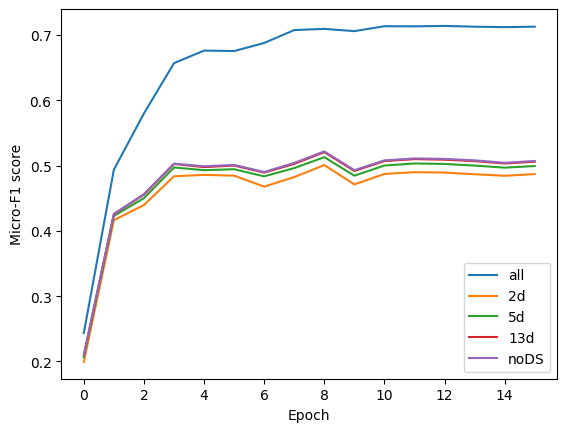

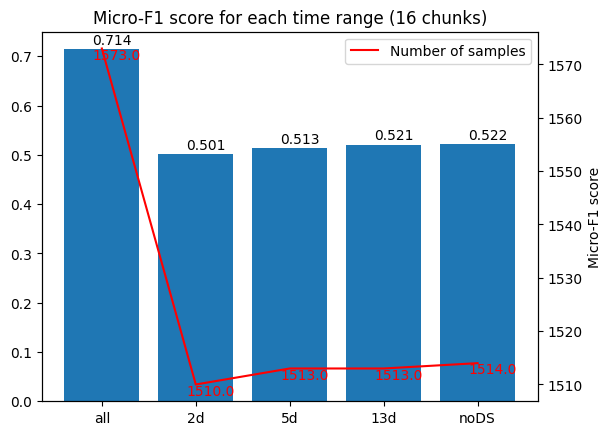

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# run_name = 'results/Definitive_temp_4_'
run_name = 'results/Bug_fix_temp_16_chunks'
plot_training(get_results(run_name, is_temp=True))
plot_performance(get_results(run_name, is_temp=True))


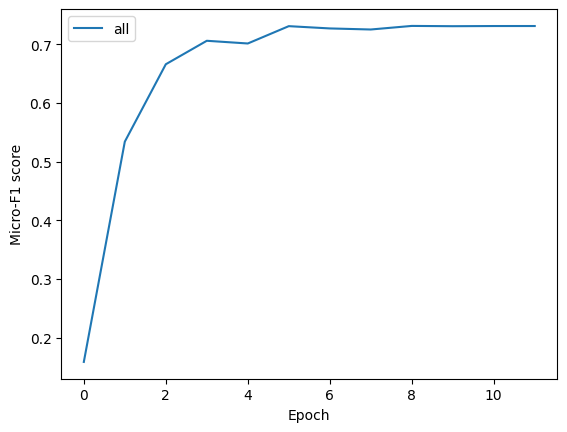

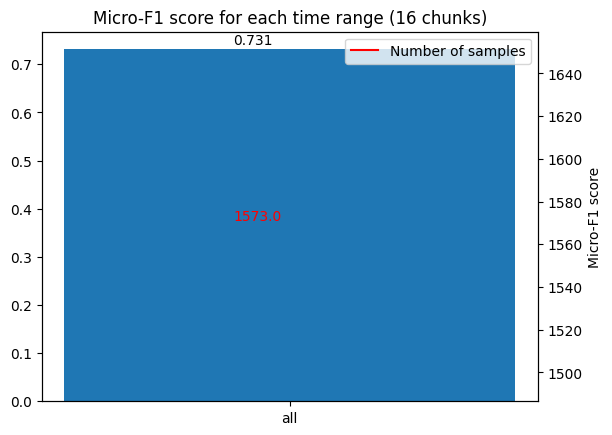

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# run_name = 'results/Definitive_temp_4_'
run_name = 'results/Bug_fix_no_temp_16_chunks'
plot_training(get_results(run_name, is_temp=False))
plot_performance(get_results(run_name, is_temp=False))